<a href="https://colab.research.google.com/github/comodoro180/ICESI_MCD/blob/main/AnalisisExploratorioDatos/Unidad_3/Pronostico_Producion_MuestrasMedicas_ST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analisis_Exploratorio/reales_mm.csv')
df

,ORIGEN,PERIODO,PAIS_ORIGEN,PAIS_DESTINO,NEGOCIO,LINEA,MARCA,ARTICULO,INVENTARIO,FACTOR_CIAL,UE,UC
0,odscol,201903,90,90,11,112,BLP,802521,SALIDAS,18,432,24
1,odscol,201903,90,90,7,71,07I,708874,SALIDAS,300,1800,6
2,odscol,201903,90,90,100,827,BLC,1109737,SALIDAS,0,0,3
3,odscol,201903,90,90,7,78,MT4,74221,SALIDAS,40,16520,413
4,odscol,201903,90,90,7,71,EZA,710321,SALIDAS MM,10,7550,755
...,...,...,...,...,...,...,...,...,...,...,...,...
155811,odsgtq,202103,32,32,7,70,DC3,3002478,SALIDAS MM,4,1672,418
155812,odsgtq,202107,32,32,7,70,DC3,3002478,SALIDAS MM,4,1944,486
155813,odsgtq,202203,32,32,7,70,DC3,3002478,SALIDAS MM,4,2040,510
155814,odsgtq,201911,32,32,7,70,IBO,3006050,SALIDAS MM,2,1064,532


In [4]:
# Se excluye el negocio 100
df = df[df['NEGOCIO'] != 100]
df.reset_index(drop=True, inplace=True)
df

,ORIGEN,PERIODO,PAIS_ORIGEN,PAIS_DESTINO,NEGOCIO,LINEA,MARCA,ARTICULO,INVENTARIO,FACTOR_CIAL,UE,UC
0,odscol,201903,90,90,11,112,BLP,802521,SALIDAS,18,432,24
1,odscol,201903,90,90,7,71,07I,708874,SALIDAS,300,1800,6
2,odscol,201903,90,90,7,78,MT4,74221,SALIDAS,40,16520,413
3,odscol,201903,90,90,7,71,EZA,710321,SALIDAS MM,10,7550,755
4,odscol,201903,90,90,73,731,UNI,456704,SALIDAS,"0,04","10,48",262
...,...,...,...,...,...,...,...,...,...,...,...,...
119625,odsgtq,202103,32,32,7,70,DC3,3002478,SALIDAS MM,4,1672,418
119626,odsgtq,202107,32,32,7,70,DC3,3002478,SALIDAS MM,4,1944,486
119627,odsgtq,202203,32,32,7,70,DC3,3002478,SALIDAS MM,4,2040,510
119628,odsgtq,201911,32,32,7,70,IBO,3006050,SALIDAS MM,2,1064,532


In [5]:
#Se seleccionan solo las columnas necesarias
columnas =['ORIGEN','PERIODO','PAIS_ORIGEN','PAIS_DESTINO','ARTICULO','UC']
df = df[columnas]
df

,ORIGEN,PERIODO,PAIS_ORIGEN,PAIS_DESTINO,ARTICULO,UC
0,odscol,201903,90,90,802521,24
1,odscol,201903,90,90,708874,6
2,odscol,201903,90,90,74221,413
3,odscol,201903,90,90,710321,755
4,odscol,201903,90,90,456704,262
...,...,...,...,...,...,...
119625,odsgtq,202103,32,32,3002478,418
119626,odsgtq,202107,32,32,3002478,486
119627,odsgtq,202203,32,32,3002478,510
119628,odsgtq,201911,32,32,3006050,532


In [6]:
df = df.groupby(['ORIGEN','PERIODO','PAIS_ORIGEN','PAIS_DESTINO','ARTICULO'], as_index=False)['UC'].sum()
df.reset_index(drop=True, inplace=True)
df

,ORIGEN,PERIODO,PAIS_ORIGEN,PAIS_DESTINO,ARTICULO,UC
0,odsbon,201811,28,28,3000205,116
1,odsbon,201811,28,28,3000212,221
2,odsbon,201811,28,28,3000960,283
3,odsbon,201811,28,28,3001260,148
4,odsbon,201811,28,28,3001277,0
...,...,...,...,...,...,...
119625,odssvc,202407,28,28,3003518,-22479
119626,odssvc,202407,28,28,3003532,5
119627,odssvc,202407,28,28,3003549,560
119628,odssvc,202407,28,28,3003648,0


In [7]:
df_unique = df[['ORIGEN','PAIS_ORIGEN','PAIS_DESTINO','ARTICULO']].drop_duplicates()
df_unique.reset_index(drop=True, inplace=True)
df_unique

,ORIGEN,PAIS_ORIGEN,PAIS_DESTINO,ARTICULO
0,odsbon,28,28,3000205
1,odsbon,28,28,3000212
2,odsbon,28,28,3000960
3,odsbon,28,28,3001260
4,odsbon,28,28,3001277
...,...,...,...,...
8286,odssvc,28,28,3002416
8287,odssvc,28,28,3003433
8288,odssvc,28,28,3003518
8289,odssvc,28,28,3003648


In [8]:
dataframes_list =[]
for row in df_unique.itertuples():
    filtered_df = df[
        (df['ORIGEN'] == row.ORIGEN) &
        (df['PAIS_ORIGEN'] == row.PAIS_ORIGEN) &
        (df['PAIS_DESTINO'] == row.PAIS_DESTINO) &
        (df['ARTICULO'] == row.ARTICULO)
    ]
        # Añadir el DataFrame filtrado a la lista
    dataframes_list.append(filtered_df)

len(dataframes_list)

8291

In [103]:
def preparar_series(df):
    df = df[['PERIODO','UC']]

    f_inicio = 201801#df.PERIODO.min()
    f_fin = 202312

    # Convertir a formato datetime
    fecha_inicio_dt = pd.to_datetime(f_inicio, format='%Y%m')
    fecha_fin_dt = pd.to_datetime(f_fin, format='%Y%m')

    # Crear un rango de fechas mensuales
    rango_fechas = pd.date_range(start=fecha_inicio_dt, end=fecha_fin_dt, freq='MS')

    # Crear el DataFrame
    df_fechas = pd.DataFrame(rango_fechas, columns=['PERIODO'])

    df_fechas['UC'] = 0

    #df['PERIODO'] =  pd.to_datetime(df['PERIODO'], format='%Y%m')
    df.loc[:,'PERIODO'] =  pd.to_datetime(df['PERIODO'], format='%Y%m')

    df_merged = pd.merge(df_fechas, df, on='PERIODO', how='left')

    df_merged['UC']=df_merged['UC_x'] + df_merged['UC_y']

    df_series = df_merged[['PERIODO','UC']]
    df_series.set_index('PERIODO', inplace=True)

    # Se rellenan los valores faltantes con cero
    df_series.loc[:,'UC'] = df_series['UC'].fillna(0)

    return df_series

In [129]:
df_serie = dataframes_list[714]
df_serie

,ORIGEN,PERIODO,PAIS_ORIGEN,PAIS_DESTINO,ARTICULO,UC
5072,odscol,201801,90,90,70335,59
6115,odscol,201802,90,90,70335,50
7330,odscol,201803,90,90,70335,31
8580,odscol,201804,90,90,70335,65
9769,odscol,201805,90,90,70335,33
...,...,...,...,...,...,...
86119,odscol,202403,90,90,70335,117
87165,odscol,202404,90,90,70335,104
88460,odscol,202405,90,90,70335,412
89682,odscol,202406,90,90,70335,-48


In [130]:
#Explorando la primer serie de la lista
df_p = preparar_series(df_serie)
df_p

,UC
PERIODO,
2018-01-01,59
2018-02-01,50
2018-03-01,31
2018-04-01,65
2018-05-01,33
...,...
2023-08-01,125
2023-09-01,171
2023-10-01,221


In [122]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2018-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   UC      72 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


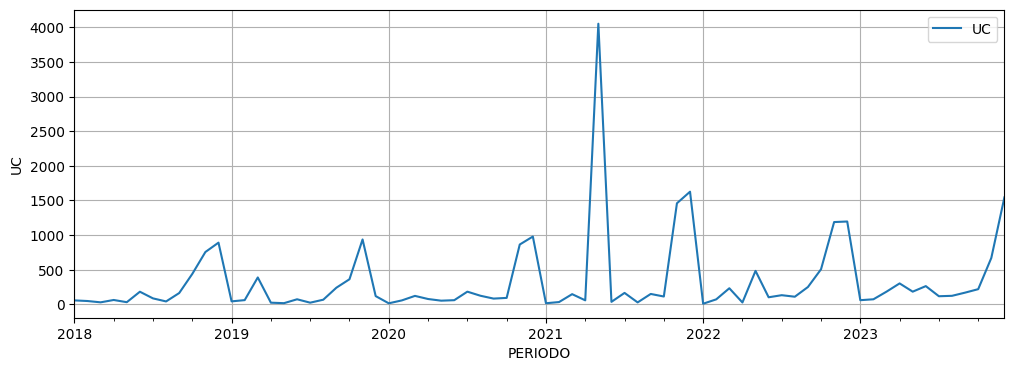

In [131]:
ax = df_p.plot(figsize=(12,4))
ax.grid()
ax.set_ylabel('UC');

<Axes: title={'center': 'UC'}, xlabel='Año'>

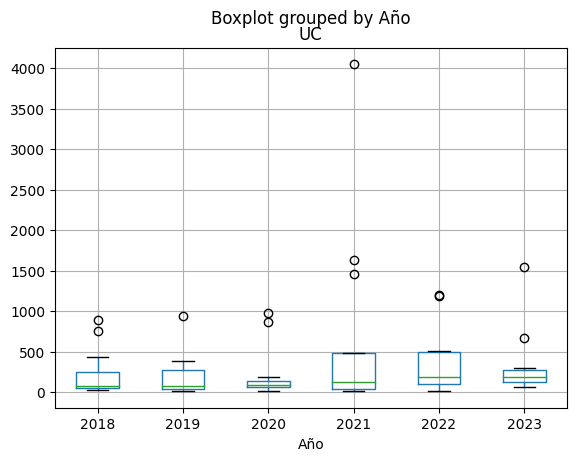

In [132]:
df_box =df_p.copy()
df_box['Año'] = df_box.index.year
df_box.boxplot(column='UC', by='Año')

In [133]:
#Calculando la media movil
df_p['media_movil'] = df_p['UC'].rolling(window=12).mean()
df_p.head(15)

,UC,media_movil
PERIODO,,
2018-01-01,59,NaN
2018-02-01,50,NaN
2018-03-01,31,NaN
2018-04-01,65,NaN
2018-05-01,33,NaN
2018-06-01,184,NaN
2018-07-01,88,NaN
2018-08-01,44,NaN
2018-09-01,165,NaN


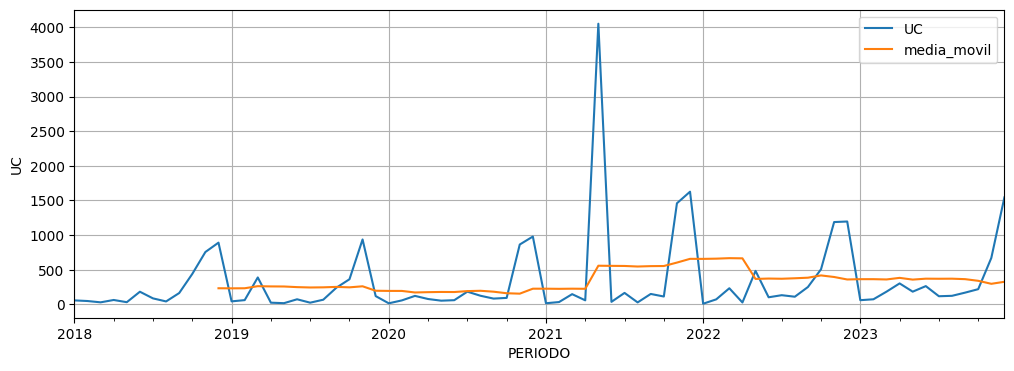

In [134]:
ax = df_p.plot(figsize=(12,4))
ax.grid()
ax.set_ylabel('UC');

In [112]:
#Descomposición de la serie
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [135]:
uc_comps_add = seasonal_decompose(df_p['UC'],model='additive')
print(f'Promedio residuales descomposición aditiva: {uc_comps_add.resid.mean()}')

Promedio residuales descomposición aditiva: 3.036805555555581


In [136]:
if (df_p['UC'] <= 0).any():
  print(f'Descartada la descomposición multiplicativa')
else:
  uc_comps_mult = seasonal_decompose(df_p['UC'],model='multiplicative')
  print(f'Promedio residuales descomposición multiplicativa: {uc_comps_mult.resid.mean()}')


Promedio residuales descomposición multiplicativa: 1.000758236620815


In [137]:
# Realizar descomposición STL
uc_stl = STL(df_p['UC']).fit()
print(f'Promedio residuales descomposición STL: {uc_stl.resid.mean()}')

Promedio residuales descomposición STL: 2.9848597121522666


In [97]:
def selecionar_descomposicion(df):
  flag = True

  #Descomposición aditiva
  uc_comps_add = seasonal_decompose(df['UC'],model='additive')
  aditiva = abs(uc_comps_add.resid.mean())

  #Descomposición multiplicativa
  if (df['UC'] <= 0).any():
    flag =False
  else:
    uc_comps_mult = seasonal_decompose(df['UC'],model='multiplicative')
    multiplicativa = abs(uc_comps_mult.resid.mean())

  #Descomposición STL
  uc_stl = STL(df['UC']).fit()
  stl = abs(uc_stl.resid.mean())

  if (flag):
    if (aditiva > multiplicativa):
       if (multiplicativa > stl):
         return 's',uc_stl
       else:
         return 'm',uc_comps_mult
    else:
      if (aditiva > stl):
        return 's',uc_stl
      else:
        return 'a',uc_comps_add
  else:
      if (aditiva > stl):
        return 's',uc_stl
      else:
        return 'a',uc_comps_add


In [98]:
metodo, modelo = selecionar_descomposicion(df_p)
print(f'Método seleccionado: {metodo}')

Método seleccionado: s


In [105]:
limite = 1500
i= 0
for d in dataframes_list:
  df_temp = preparar_series(d)
  metodo, modelo = selecionar_descomposicion(df_temp)
  if metodo == 'm':
    print(f'{i} Método seleccionado: {metodo}')
  if i == limite:
    break
  i+=1

573 Método seleccionado: m
715 Método seleccionado: m
1006 Método seleccionado: m
1030 Método seleccionado: m
1041 Método seleccionado: m
1079 Método seleccionado: m
1085 Método seleccionado: m
